In [3]:
source("common.R")

levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

df <-
  read_csv("data/tidy_ons_longcovid.csv", show_col_types = F)%>%
  filter(Domain == "Age group")%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = levels))

df%>%head

Impact on daily activity,Domain,Group,Estimate,Lower 95% confidence limit,Upper 95% confidence limit,filename,Unit,Week Ending Date,midpoint_date
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<date>,<date>
Activity not limited,Age group,2 to 11,8,3,12,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Age group,12 to 16,10,7,14,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Age group,17 to 24,19,13,26,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Age group,25 to 34,41,31,51,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Age group,35 to 49,112,101,124,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Age group,50 to 69,151,140,161,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19


Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”


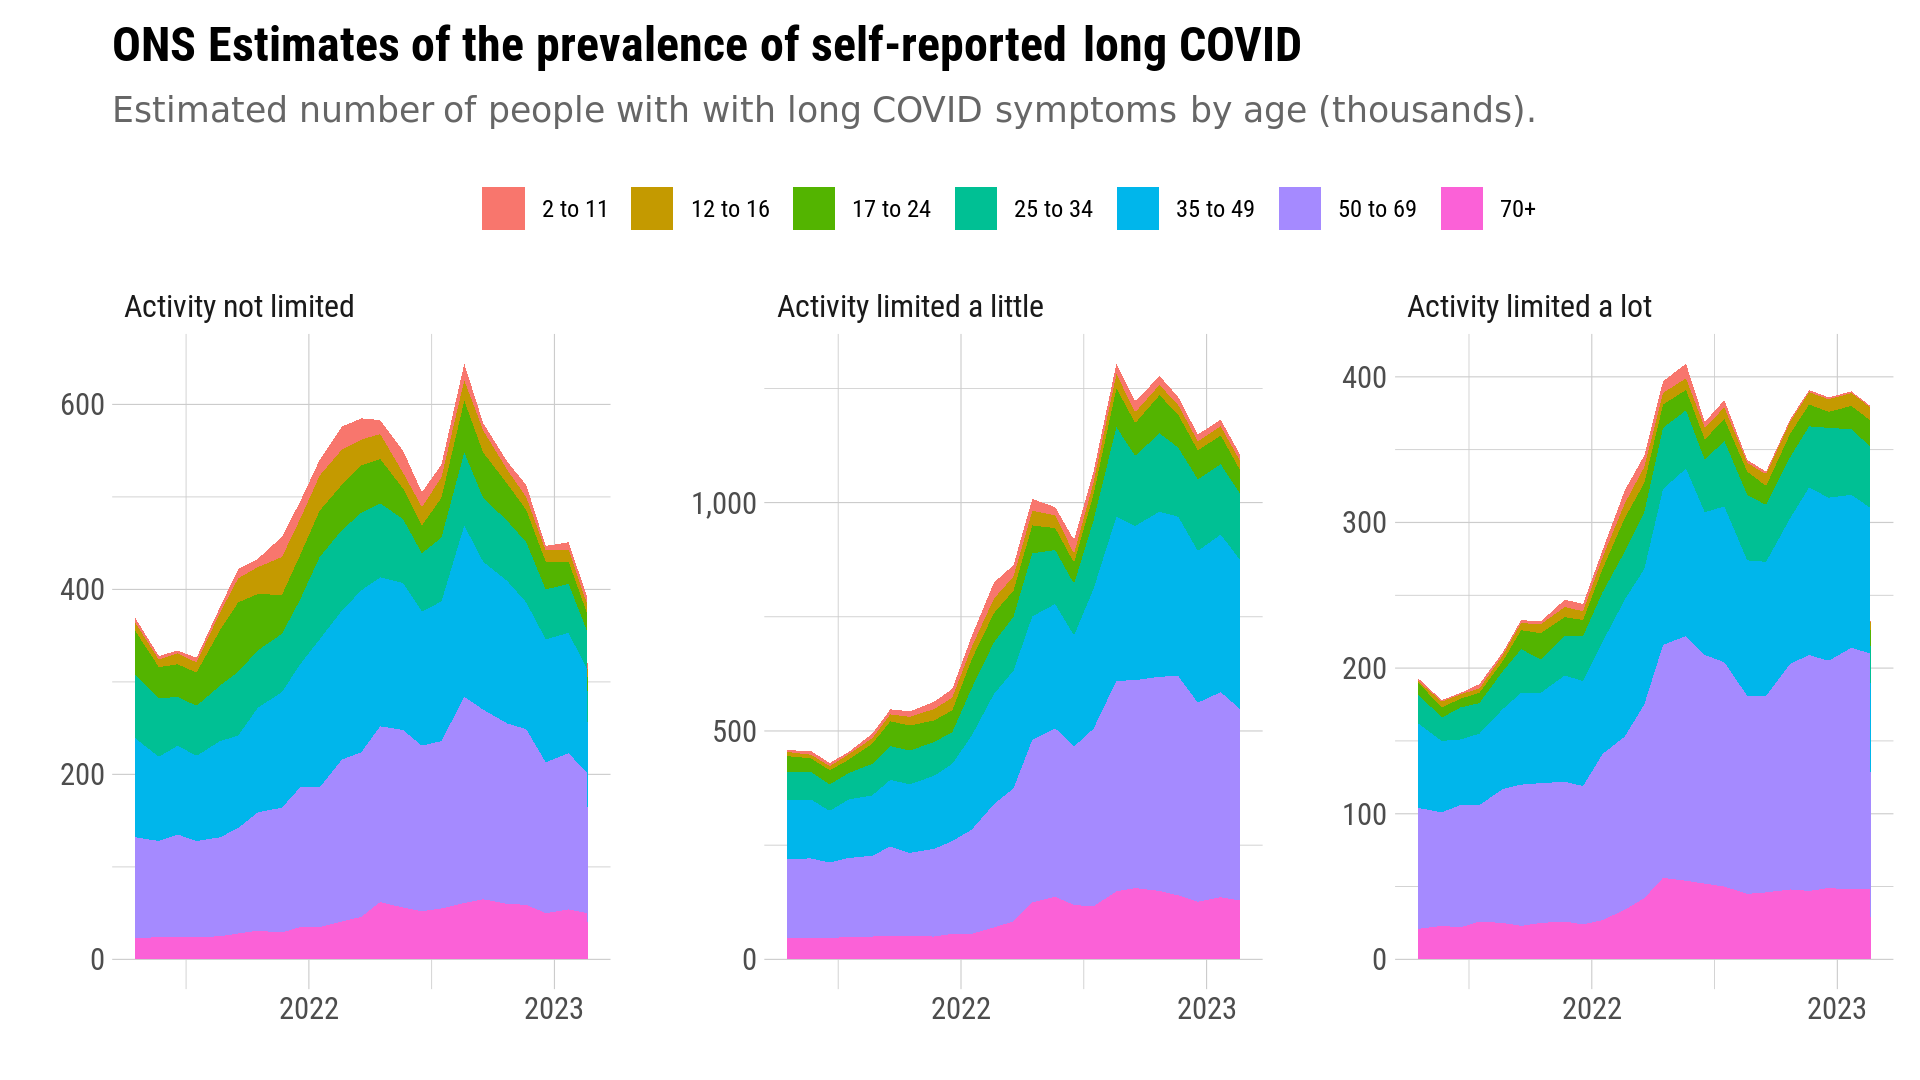

In [2]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  filter(Unit == "Thousands") %>%
  ggplot(aes(x = midpoint_date, y = Estimate, 
             fill = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms by age (thousands).",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, nrow = 1, scale = "free_y") +
  theme(legend.position  = "top") +
  guides(fill=guide_legend(nrow = 1)) +
  savePlot("ONS_LC_age1")

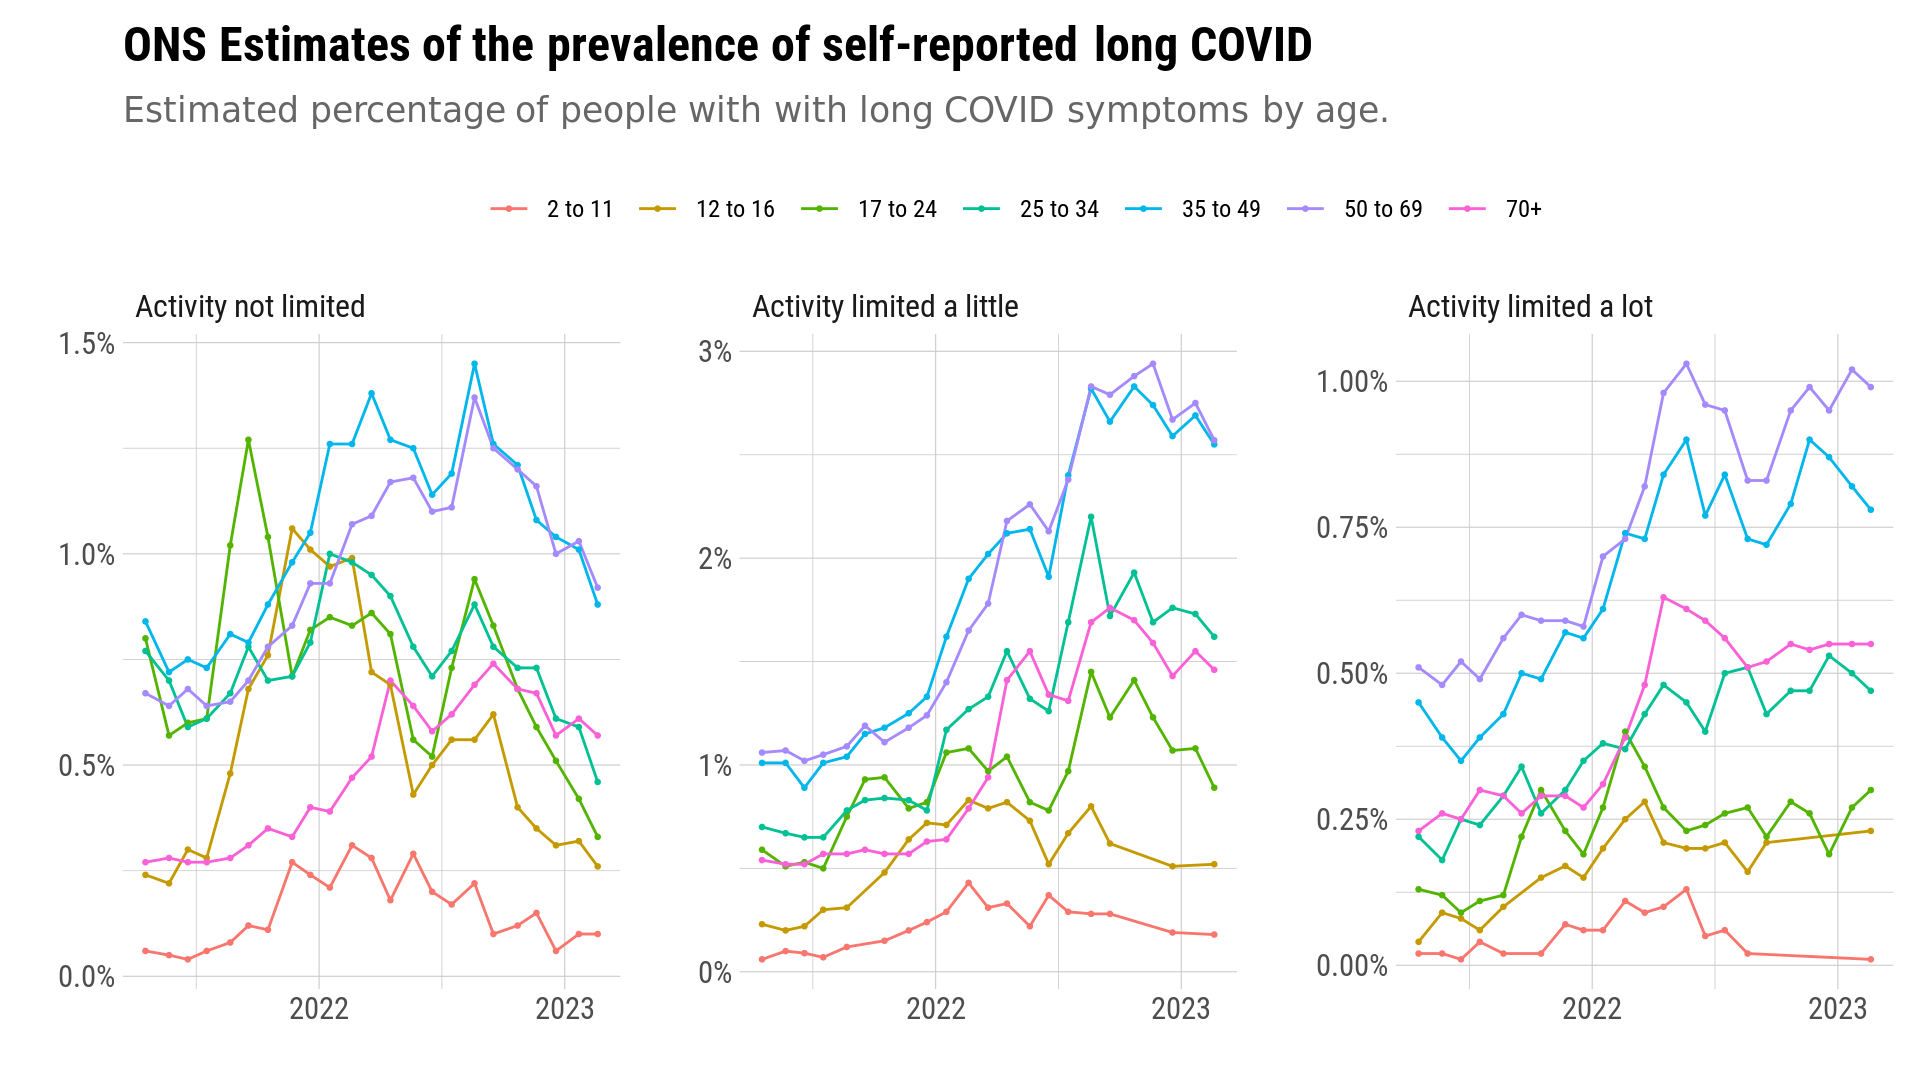

In [18]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  filter(Unit == "Percent") %>%
  na.omit()%>%
  ggplot(aes(x = midpoint_date, y = Estimate, 
             color = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated percentage of people with with long COVID symptoms by age.",
       color = "", x = "", y = "") +
  geom_line() +
  geom_point(size = .5) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  facet_wrap(~`Impact on daily activity`, nrow = 1, scale = "free_y") +
  theme(legend.position  = "top") +
  guides(color = guide_legend(nrow = 1)) +
  savePlot("ONS_LC_age2")

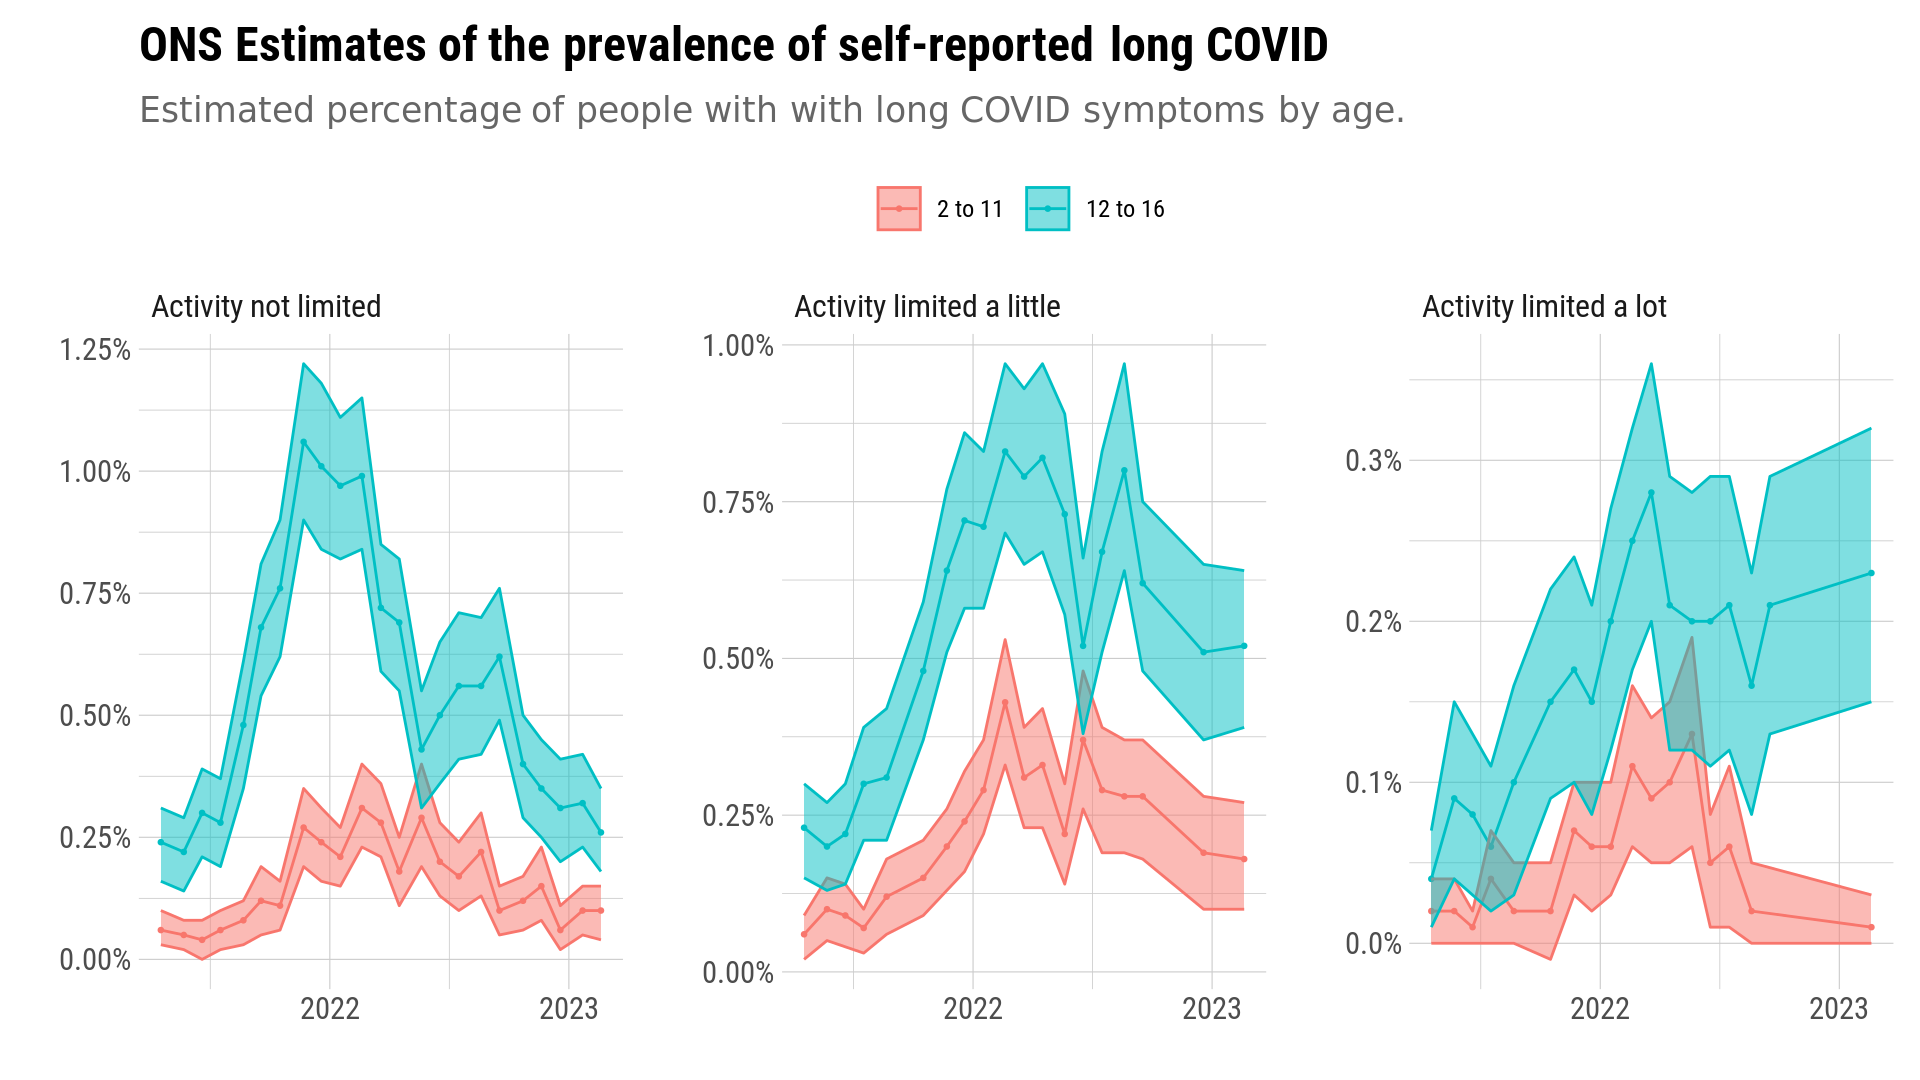

In [7]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  filter(Unit == "Percent") %>%
  filter(Group %in% c("2 to 11", "12 to 16")) %>%
  na.omit()%>%
  ggplot(aes(x = midpoint_date, y = Estimate, 
             color = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated percentage of people with with long COVID symptoms by age.",
       color = "", fill = "", x = "", y = "") +
  geom_line() +
  geom_point(size = .5) +
  geom_ribbon(aes(ymin = `Lower 95% confidence limit`,
                  ymax = `Upper 95% confidence limit`,
                  fill = reorder(Group, parse_number(Group))),
              alpha = 0.5) +
#  geom_errorbar(aes(ymin = `Lower 95% confidence limit`,
#                    ymax = `Upper 95% confidence limit`), width=28) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  facet_wrap(~`Impact on daily activity`, nrow = 1, scale = "free_y") +
  theme(legend.position  = "top") +
  guides(color = guide_legend(nrow = 1),
        fill = guide_legend(nrow = 1)) +
  savePlot("ONS_LC_age2")

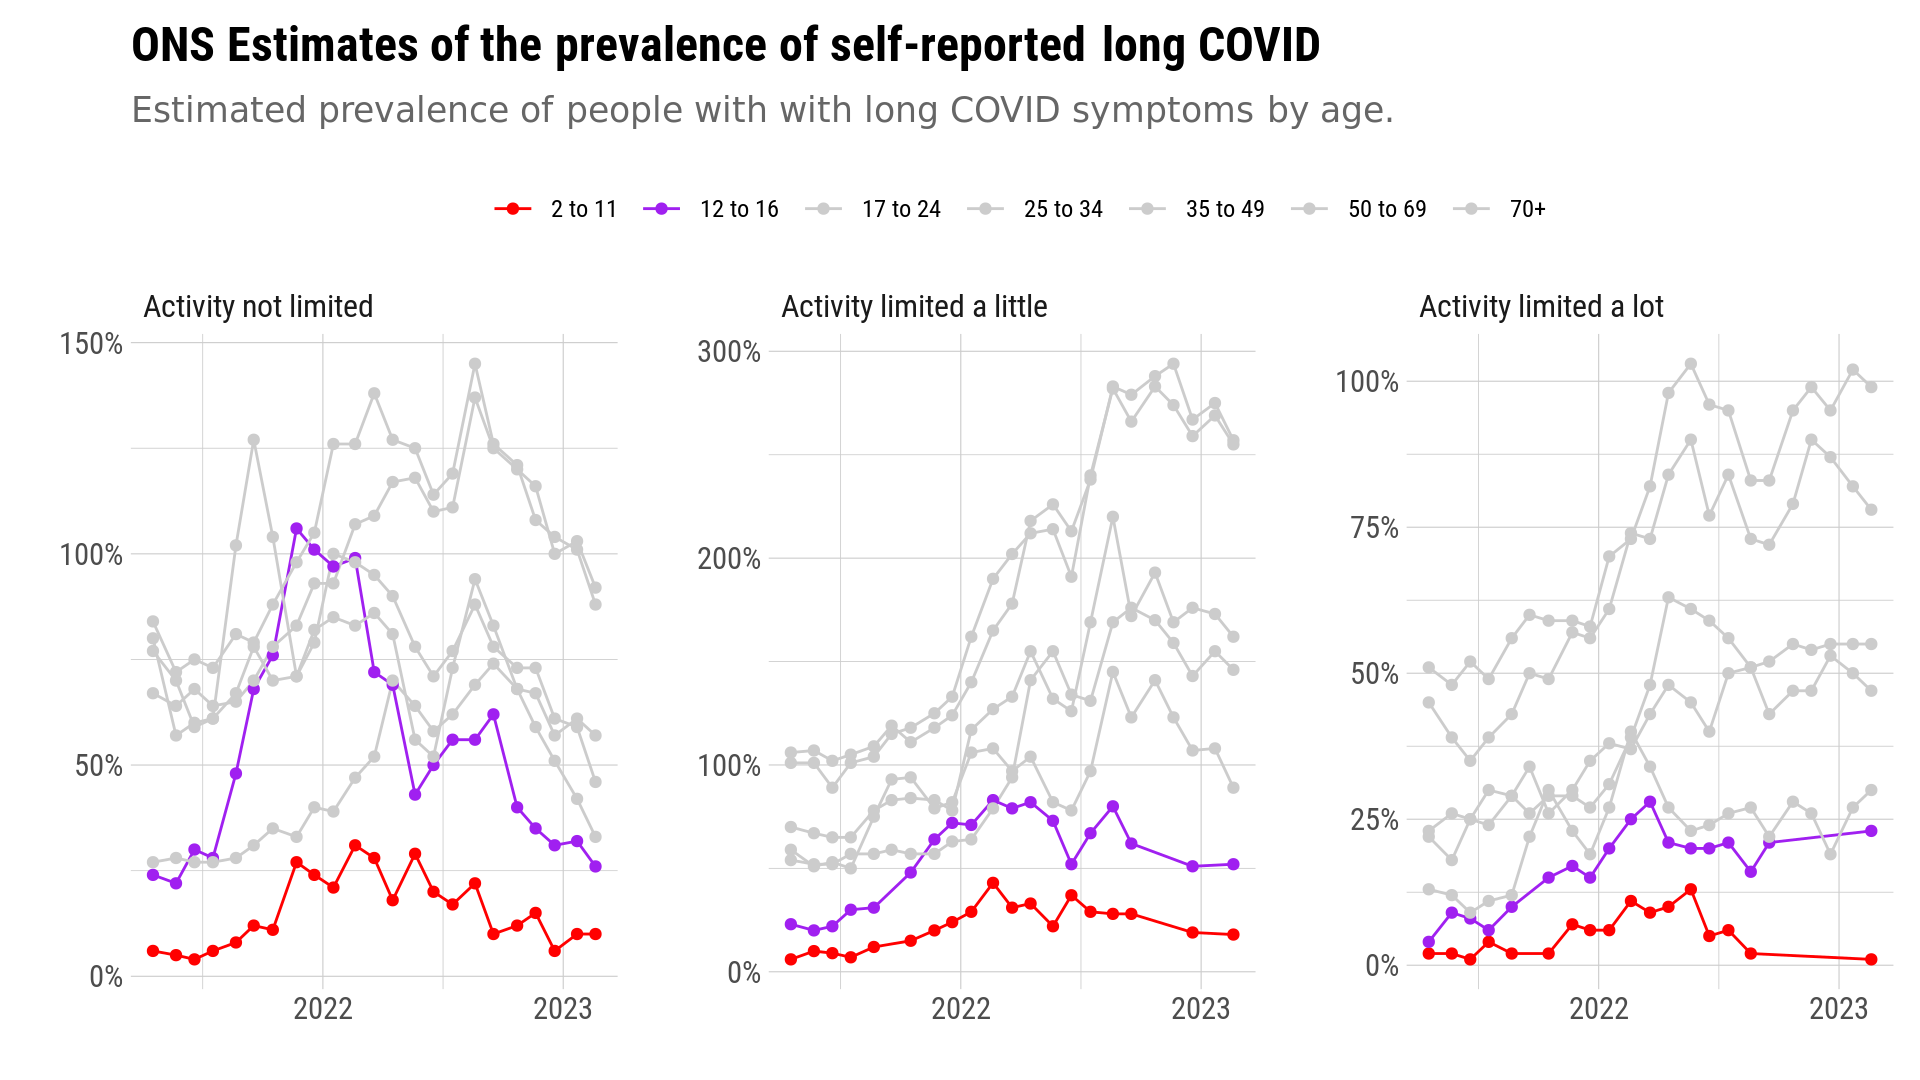

In [19]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  filter(Unit =="Percent")%>%
  na.omit()%>%
  ggplot(aes(x = midpoint_date, y = Estimate, color = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated prevalence of people with with long COVID symptoms by age.",
       color = "", x = "", y = "") +
  geom_line() +
  geom_point() +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::percent) +
  facet_wrap(~`Impact on daily activity`, nrow = 1, scale = "free_y") +
  theme(legend.position  = "top") +
  guides(color = guide_legend(nrow = 1)) +
  scale_color_manual(values  = c("red", "purple", "gray80", "gray80", "gray80", "gray80", "gray80", "gray80") )+
  savePlot("ONS_LC_age3")

Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”


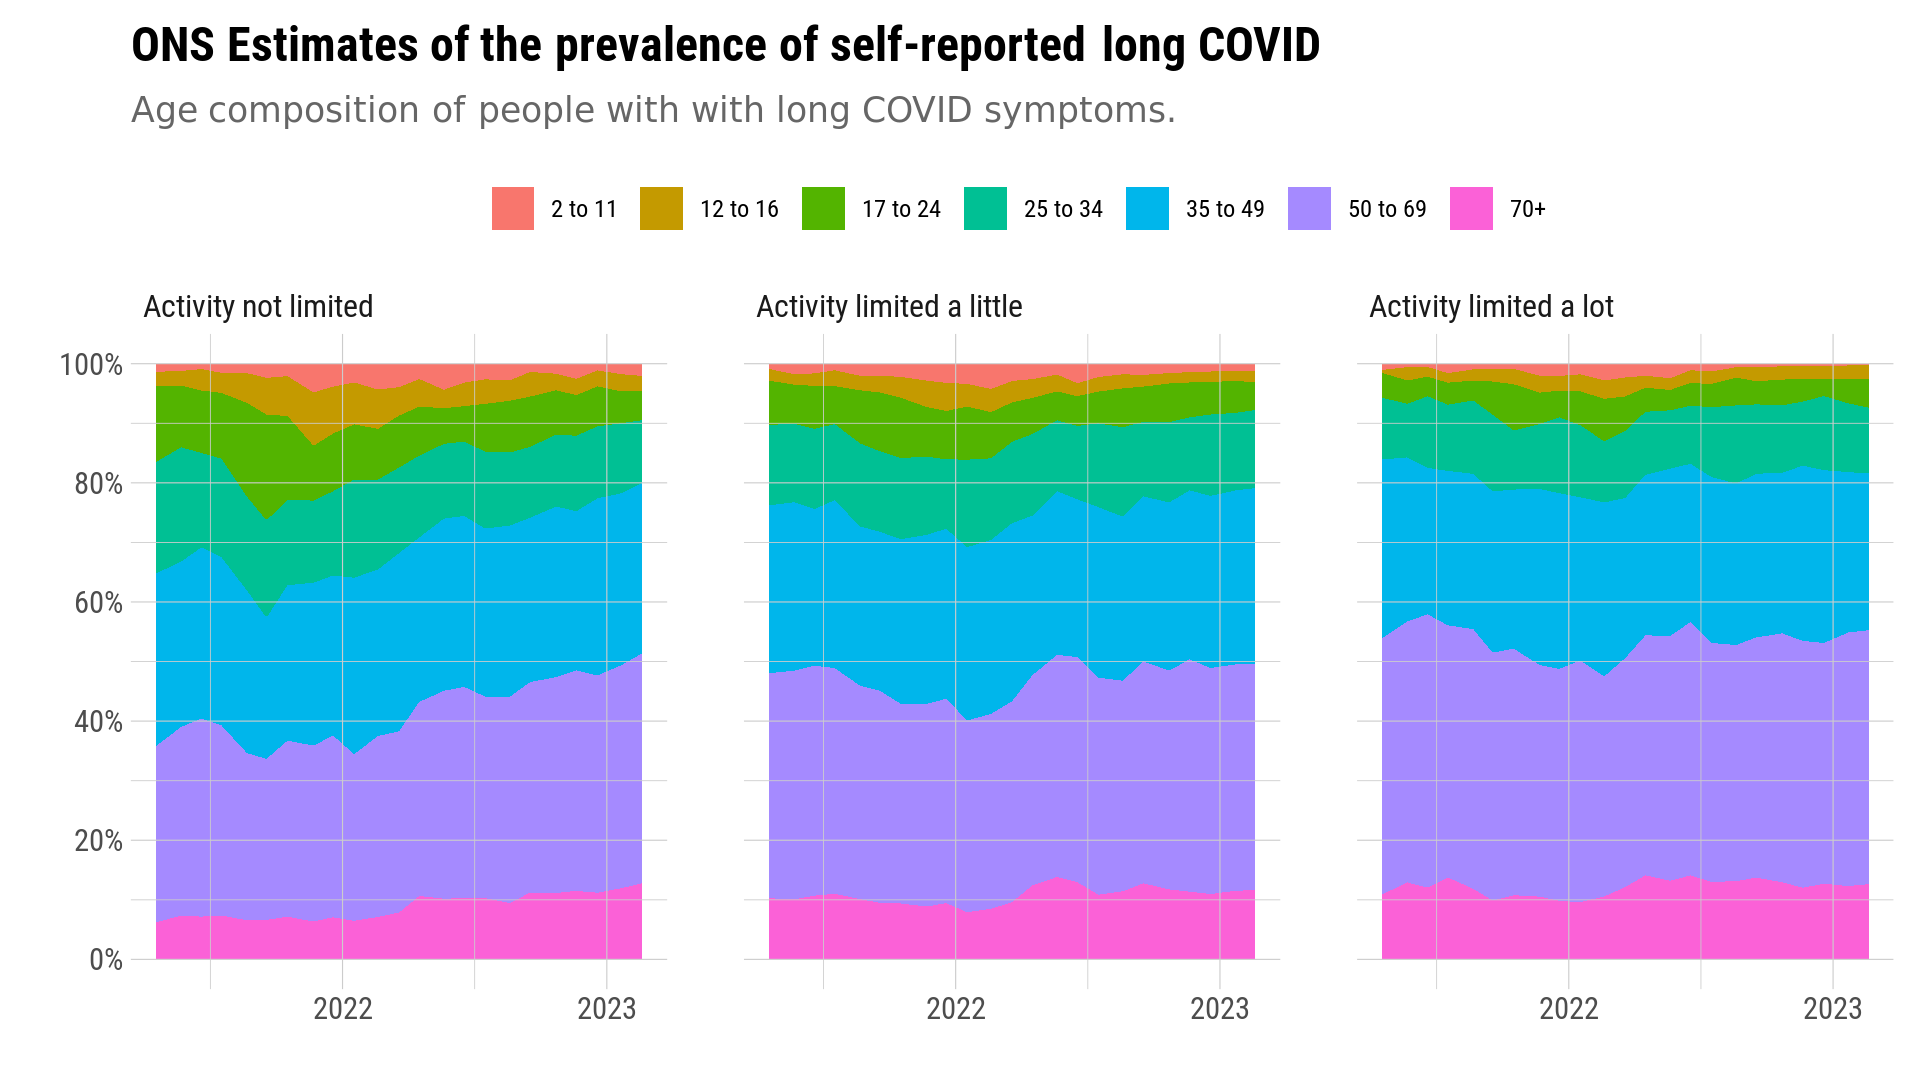

In [5]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  ggplot(aes(x = midpoint_date, y = Estimate*1000, 
             fill = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Age composition of people with with long COVID symptoms.",
       fill = "", x = "", y = "") +
  geom_area(position = "fill") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.2)) +
  facet_wrap(~`Impact on daily activity`, nrow = 1) +
  theme(legend.position  = "top", panel.ontop = TRUE) +
  guides(fill = guide_legend(nrow = 1)) +
  savePlot("ONS_LC_age_share")